In [11]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bottom_left =cv2.cvtColor(cv2.resize(cv2.imread('ImageCollage dataset/bottom_left.jpg'),(200,200)),cv2.COLOR_BGR2RGB)
bottom_right=cv2.cvtColor(cv2.resize(cv2.imread('ImageCollage dataset/bottom_right.jpg'),(200,200)),cv2.COLOR_BGR2RGB)
center=cv2.cvtColor(cv2.resize(cv2.imread('ImageCollage dataset/center.jpeg'),(200,200)),cv2.COLOR_BGR2RGB)
top_left=cv2.cvtColor(cv2.resize(cv2.imread('ImageCollage dataset/top_left.jpg'),(200,200)),cv2.COLOR_BGR2RGB)
top_right=cv2.cvtColor(cv2.resize(cv2.imread('ImageCollage dataset/top_right.jpg'),(200,200)),cv2.COLOR_BGR2RGB)

In [3]:
pokemon={1: bottom_left,2: bottom_right,3: center,4:top_left,5:top_right}

In [4]:
pokemon_bor={}
for x in (1,2,3,4,5):
    top = int(0.025 * pokemon.get(x).shape[0])  # shape[0] = rows
    bottom = top
    left = int(0.025 * pokemon.get(x).shape[1])  # shape[1] = cols
    right = left
    if x==3 :
        top = int(0.1 * pokemon.get(x).shape[0])  # shape[0] = rows
        bottom = top
        left = int(0.1 * pokemon.get(x).shape[1])  # shape[1] = cols
        right = left
    pokemon_bor[x]= cv2.copyMakeBorder(pokemon.get(x), top, bottom, left, right,cv2.BORDER_CONSTANT)

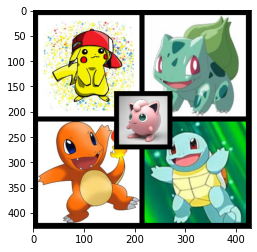

True

In [5]:
# Vertically stack up two images of first capture
col1 = np.vstack([pokemon_bor[4], pokemon_bor[1]])
# Vertically stack up two images of second capture
col2 = np.vstack([pokemon_bor[5], pokemon_bor[2]])
# Now horizontally put them side-by-side
collage = np.hstack([col1, col2])
top = int(0.0125 * collage.shape[0])  # shape[0] = rows
bottom = top
left = int(0.0125 * collage.shape[1])  # shape[1] = cols
right = left
collage_1= cv2.copyMakeBorder(collage, top, bottom, left, right,cv2.BORDER_CONSTANT)
collage_1[160:275,160:275,:]=cv2.resize(pokemon_bor[3],(115,115))
plt.imshow(collage_1)
plt.show()
collage_M=cv2.cvtColor(collage_1,cv2.COLOR_BGR2RGB)
cv2.imwrite("Sam_image.jpg",collage_M)

In [7]:
data = collage_M.reshape((430*430,3))

In [12]:
df = pd.DataFrame(data,columns=['r','g','b'])

In [13]:
df.head()

,r,g,b
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [15]:
df.to_csv('Test_ins.csv',index=False)